In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, decomposition
import seaborn as sns
train_data = np.load('fashion_train.npy')
test_data = np.load('fashion_test.npy')

X_train = train_data[:, :-1]  
y_train = train_data[:, -1]   

X_test = test_data[:, :-1]   
y_test = test_data[:, -1]     


mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std 


n_components = 110
pca = decomposition.PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"X_train_pca shape: {X_train_pca.shape}, y_train shape: {y_train.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}, y_test shape: {y_test.shape}")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

/Users/alexjizdan/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


X_train_pca shape: (10000, 110), y_train shape: (10000,)
X_test_pca shape: (5000, 110), y_test shape: (5000,)
X_train shape: (10000, 784), y_train shape: (10000,)
X_test shape: (5000, 784), y_test shape: (5000,)


In [2]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report, accuracy_score

def create_ffnn():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(110,)),
        Dense(32, activation='relu'),
        Dense(5, activation='softmax')
    ])
    return model


model = create_ffnn()
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=10,          
    restore_best_weights=True  
)

history = model.fit(
    X_train_pca, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_test_pca, y_test),
    callbacks=[early_stopping]  
)

loss, accuracy = model.evaluate(X_test_pca, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


y_pred = model.predict(X_test_pca)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()


print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


print(f"Overall Accuracy: {accuracy_score(y_test, y_pred_classes):.4f}")


Epoch 1/200


/Users/alexjizdan/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.7208 - loss: 0.7833 - val_accuracy: 0.8184 - val_loss: 0.4796
Epoch 2/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.8392 - loss: 0.3914 - val_accuracy: 0.8280 - val_loss: 0.4595
Epoch 3/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.8571 - loss: 0.3640 - val_accuracy: 0.8414 - val_loss: 0.4333
Epoch 4/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.8759 - loss: 0.3129 - val_accuracy: 0.8238 - val_loss: 0.4425
Epoch 5/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.8766 - loss: 0.3087 - val_accuracy: 0.8460 - val_loss: 0.4378
Epoch 6/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.8849 - loss: 0.2889 - val_accuracy: 0.8364 - val_loss: 0.4474
Epoch 7/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.8932 - loss: 0.2636 - val_accuracy: 0.8370 - val_loss: 0.4533
Epoch 8/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.8978 - loss: 0.2645 - val_

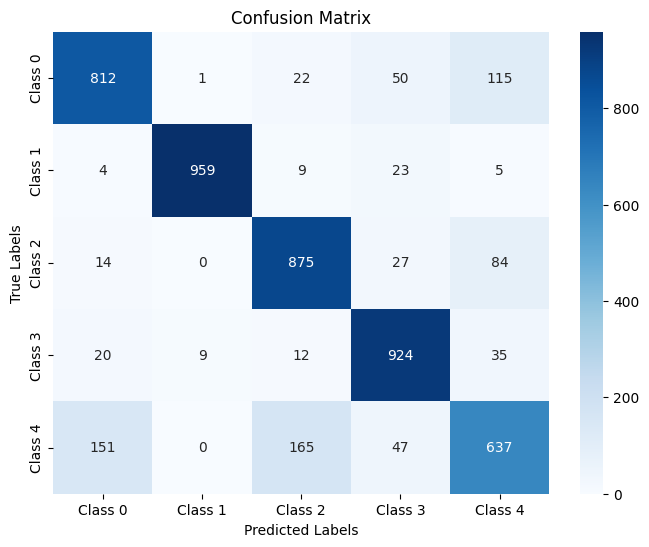

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(5)], yticklabels=[f'Class {i}' for i in range(5)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

